### Cleaning Data

In [1]:
# pd.DataFrame.describe()
# pd.DataFrame.info()

In [2]:
# Converting types in a Data Frame column
# df.column = df.column.astype(int) ...or astype(float), etc.

# factor types: categoricals, ordinals (low, medium, high)

#### Converting custom N/A values

In [3]:
# pd.read_csv(..., na_values=['N/A', 'Unknown'])
# or
# pd.DataFrame.replace('N/A', None)

#### Dropping nulls, Filling nulls

In [4]:
# pd.DataFrame.dropna(axis=1, how='any') ...check documentation

In [5]:
# pd.DataFrame.fillna(method='bfill')

# or use interpolate on time series data:
# df.column.interpolate()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)

In [9]:
data.replace({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}, inplace=True)

In [10]:
data.replace({'GdPrv': 2, 'GdWd': 2, 'MnPrv': 1, 'MnWw': 1}, inplace=True)

In [11]:
data.MSZoning.replace({'C (all)': 'C'}, inplace=True)

In [12]:
data.MasVnrType.fillna('None')

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
5          None
6         Stone
7         Stone
8          None
9          None
10         None
11        Stone
12         None
13        Stone
14      BrkFace
15         None
16      BrkFace
17         None
18         None
19         None
20      BrkFace
21         None
22      BrkFace
23         None
24         None
25        Stone
26         None
27        Stone
28         None
29         None
         ...   
1430       None
1431       None
1432       None
1433    BrkFace
1434       None
1435    BrkFace
1436       None
1437      Stone
1438       None
1439    BrkFace
1440       None
1441    BrkFace
1442      Stone
1443       None
1444    BrkFace
1445       None
1446    BrkFace
1447    BrkFace
1448       None
1449       None
1450       None
1451      Stone
1452    BrkFace
1453       None
1454       None
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length

In [13]:
df = data.groupby(['MasVnrType'])

In [14]:
df.agg(np.count_nonzero)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15.0,15,15,15,15,15,15,...,0,15.0,15,15,2,15,15,15,15,15
BrkFace,445,445,445,445.0,445,445,445,445,445,445,...,2,445.0,445,445,11,445,445,445,445,445
None,864,864,864,864.0,864,864,864,864,864,864,...,4,864.0,864,864,38,864,864,864,864,864
Stone,128,128,128,128.0,128,128,128,128,128,128,...,1,128.0,128,128,1,128,128,128,128,128


In [15]:
data.LotFrontage.fillna(0)
data.MasVnrArea.fillna(0)
data.BsmtFinSF1.fillna(0)
data.BsmtFinSF2.fillna(0)
data.BsmtUnfSF.fillna(0)
data.TotalBsmtSF.fillna(0)
data.BsmtFullBath.fillna(0)
data.BsmtHalfBath.fillna(0)
data.GarageCars.fillna(0)
data.GarageArea.fillna(0)

0       548
1       460
2       608
3       642
4       836
5       480
6       636
7       484
8       468
9       205
10      384
11      736
12      352
13      840
14      352
15      576
16      480
17      516
18      576
19      294
20      853
21      280
22      534
23      572
24      270
25      890
26      576
27      772
28      319
29      240
       ... 
1430    372
1431    440
1432    216
1433    451
1434    484
1435    462
1436    528
1437    774
1438    923
1439    550
1440    672
1441    420
1442    812
1443    192
1444    626
1445    240
1446    312
1447    556
1448    384
1449      0
1450      0
1451    840
1452    525
1453      0
1454    400
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64

### Exploratory Data Analsis

In [16]:
# pd.DataFrame.describe()
# pd.DataFrame.info()

In [17]:
# filter and query/subset the data based on filters

In [18]:
# sort_values(), value_counts()

In [19]:
# groupby and stack the data: df.groupby([df.column1, ...])[df.column3].sum() ...or .size(), etc.
# pivot the data: df.pivot(index=..., columns=..., values=...)

In [20]:
# transform data with a function:
# f = lambda x: len(str(x))
# df[df.column].map(f)

In [21]:
# merge the data set on itself

In [22]:
import os
os.curdir

'.'

In [23]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.00000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,3.39589,...,46.660274,21.954110,3.409589,15.060959,2.758904,3.714286,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,0.57428,...,66.256028,61.119149,29.317331,55.757415,40.177307,1.253566,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,...,25.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,4.00000,...,68.000000,0.000000,0.000000,0.000000,0.000000,4.500000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,...,547.000000,552.000000,508.000000,480.000000,738.000000,5.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [26]:
cat_columns = data.select_dtypes(['object']).columns
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
data[cat_columns] = data[cat_columns].apply(lambda x: x.astype('category'))

In [28]:
for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
            'GarageQual', 'PoolQC']:
    data[col] = data[col].astype('category')
data.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual      category
TotRmsAbvGrd        int64
Functional       category
Fireplaces          int64
FireplaceQu      category
GarageType  

In [29]:
data['MSZoning'].cat.categories

Index(['C', 'FV', 'RH', 'RL', 'RM'], dtype='object')

In [30]:
data.MSZoning.value_counts()

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

In [31]:
cat_columns = data.select_dtypes(['category']).columns
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [32]:
data.MSZoning.cat.codes.value_counts()

3    1151
4     218
1      65
2      16
0      10
dtype: int64

In [33]:
df = data[cat_columns]
df.head()
#df.apply(pd.value_counts)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,NaN,Attchd,RFn,3.0,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,3.0,Attchd,RFn,3.0,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,3.0,Attchd,RFn,3.0,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,4.0,Detchd,Unf,3.0,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,3.0,Attchd,RFn,3.0,Y,NaN,NaN,NaN,WD,Normal


In [34]:
data.MSZoning.cat.codes.value_counts() / data.MSZoning.cat.codes.value_counts().sum()

3    0.788356
4    0.149315
1    0.044521
2    0.010959
0    0.006849
dtype: float64

In [35]:
def nearZeroVarPreds(df):
    """ This function applies the near-zero variance rules in Kuhn, Johnson's Applied Predictive Modeling textbook to
    categorical variables in a pandas dataframe. It uses a 10% threshold for fraction of unique values to total number of
    records in the data, and a ratio of 20 for the proportion of the most frequently occuring category to the ratio of the
    second most frequently occuring category.
    [Near-zero variance means that the] fraction of unique values over the sample size is low (say 10%) [...] [and the] ratio of
    the frequency of the most prevalent value to the frequency of the second most prevalent value is large (say around 20). If
    both of these criteria are true and the model in question is susceptible to this type of predictor, it may be advantageous
    to remove the variable from the model.
    -- Kuhn, M., & Johnson, K. (2013). Applied predictive modeling, New York, NY: Springer.
    See also: https://stats.stackexchange.com/questions/145602/justification-for-feature-selection-by-removing-predictors-with-near-zero-variance
    """
    nearZeroVarPreds = []
    for column in df:
        if df[column].dtype.name == 'category':
            fractionOfUniqValues = len(df[column].cat.categories) / df.shape[0] # fraction of unique categories to total number of records in the data
            colValCounts = df[column].cat.codes.value_counts().tolist() # returns values counts, sorted, as a list
            if len(colValCounts) > 1:
                ratioOfCatFreqs = colValCounts[0] / colValCounts[1] # ratio of top to 2nd most frequently occuring category
            else:
                ratioOfCatFreqs = 100
            if fractionOfUniqValues < .10 and ratioOfCatFreqs >= 20:
                nearZeroVarPreds.append(column)
    return(nearZeroVarPreds)

In [36]:
len(data['MSZoning'].cat.categories)

5

In [37]:
data.shape[0]

1460

In [38]:
data['MSZoning'].cat.codes.value_counts().tolist()

[1151, 218, 65, 16, 10]

In [39]:
data['MSZoning'].cat.codes.value_counts().tolist()[0] / len(data['MSZoning'])

0.7883561643835616

In [40]:
def nearZeroVarPreds2(df):
    """ This function applies the near-zero variance rules in Kuhn, Johnson's Applied Predictive Modeling textbook to
    categorical variables in a pandas dataframe. It uses a 10% threshold for fraction of unique values to total number of
    records in the data, and a ratio of 20 for the proportion of the most frequently occuring category to the ratio of the
    second most frequently occuring category.
    [Near-zero variance means that the] fraction of unique values over the sample size is low (say 10%) [...] [and the] ratio of
    the frequency of the most prevalent value to the frequency of the second most prevalent value is large (say around 20). If
    both of these criteria are true and the model in question is susceptible to this type of predictor, it may be advantageous
    to remove the variable from the model.
    -- Kuhn, M., & Johnson, K. (2013). Applied predictive modeling, New York, NY: Springer.
    See also: https://stats.stackexchange.com/questions/145602/justification-for-feature-selection-by-removing-predictors-with-near-zero-variance
    """
    nearZeroVarPreds = []
    for column in df:
        if df[column].dtype.name == 'category':
            fractionOfUniqValues = df[column].cat.codes.value_counts().tolist()[0] / len(df[column]) # fraction of unique categories to total number of records in the data
            colValCounts = df[column].cat.codes.value_counts().tolist() # returns values counts, sorted, as a list
            if len(colValCounts) > 1:
                ratioOfCatFreqs = colValCounts[1] / colValCounts[0] # ratio of 2nd to 1st most frequently occuring category
            else:
                ratioOfCatFreqs = 1
            if fractionOfUniqValues > 0.90 and ratioOfCatFreqs <= 0.05:
                nearZeroVarPreds.append(column)
    return(nearZeroVarPreds)

In [41]:
variable_list = nearZeroVarPreds2(data)
variable_list

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'Functional',
 'PoolQC',
 'MiscFeature']

In [42]:
from sklearn.feature_selection import VarianceThreshold

In [43]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data2 = data.select_dtypes(include=numerics)
data2 = data2.fillna(0)
data2.shape

(1460, 39)

In [44]:
selector = VarianceThreshold()
data3 = selector.fit_transform(data2)
data3.shape

(1460, 39)

#### Sales Price distribution plots

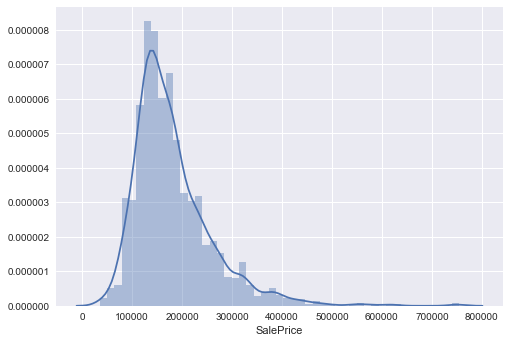

In [45]:
sns.distplot(data.SalePrice)
plt.show()

In [46]:
data['SalePriceLog'] = np.log(data.SalePrice)
data.SalePriceLog.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePriceLog, dtype: float64

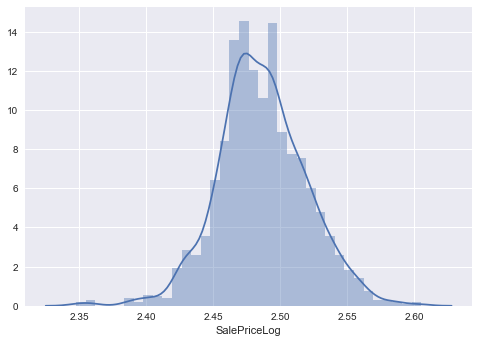

In [47]:
sns.distplot(np.log(data.SalePriceLog))
plt.show()

#### Top Neighborhoods and boxplot

In [48]:
nbhood_sales = pd.DataFrame(data, columns=['Neighborhood', 'SalePrice'])
nbhood_sales = nbhood_sales.groupby(nbhood_sales.Neighborhood).agg([np.median, np.count_nonzero])
nbhood_sales.sort_values([('SalePrice', 'median')], ascending=False).head()

SalePrice              
                median count_nonzero
Neighborhood                        
NridgHt         315000            77
NoRidge         301500            41
StoneBr         278000            25
Timber          228475            38
Somerst         225500            86

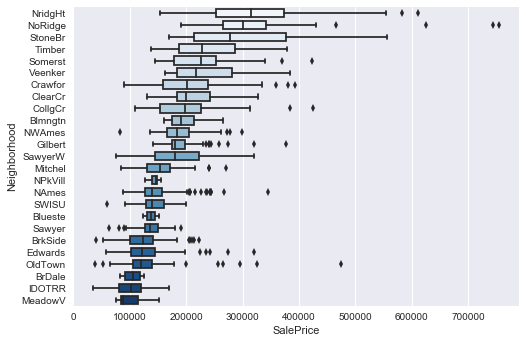

In [49]:
df = data.sort_values('Neighborhood')
ranks = data.groupby('Neighborhood')['SalePrice'].median().fillna(0).sort_values(ascending=False).index
sns.boxplot(df.SalePrice, df.Neighborhood, order=ranks, palette=sns.color_palette("Blues", 25), width=0.7)
plt.figure(figsize=(6, 8))
plt.show()

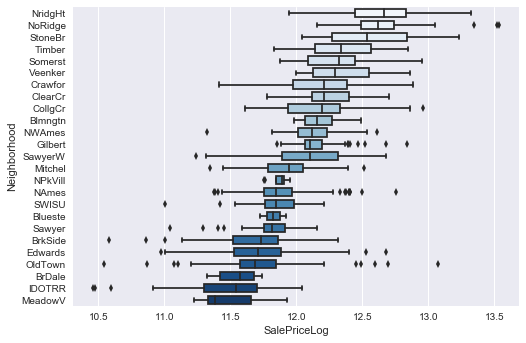

In [50]:
df = data.sort_values('Neighborhood')
ranks = data.groupby('Neighborhood')['SalePriceLog'].median().fillna(0).sort_values(ascending=False).index
sns.boxplot(df.SalePriceLog, df.Neighborhood, order=ranks, palette=sns.color_palette("Blues", 25), width=0.7)
plt.figure(figsize=(6, 8))
plt.show()

#### Quality Indicator boxplots

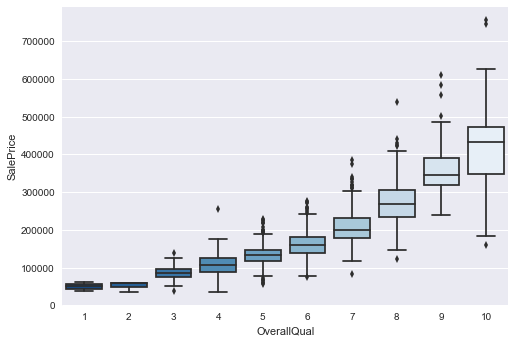

In [51]:
sns.boxplot(data.OverallQual, data.SalePrice, palette=sns.color_palette("Blues_r", 10))
plt.figure(figsize=(8, 6))
plt.show()

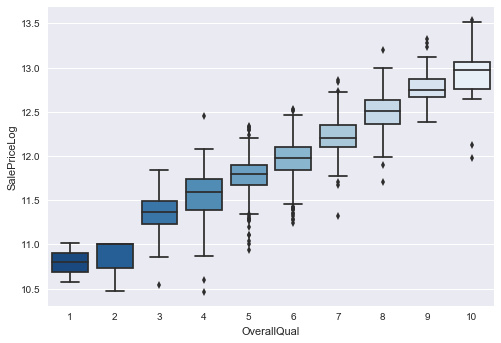

In [52]:
sns.boxplot(data.OverallQual, data.SalePriceLog, palette=sns.color_palette("Blues_r", 10))
plt.figure(figsize=(8, 6))
plt.show()

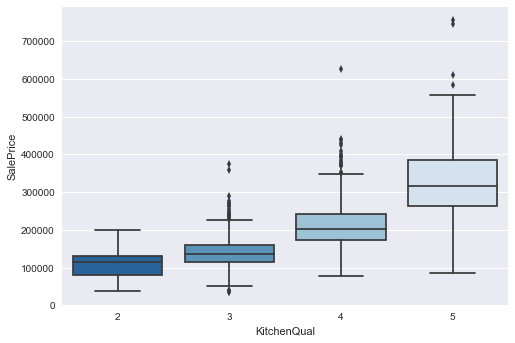

In [53]:
sns.boxplot(data.KitchenQual, data.SalePrice, palette=sns.color_palette("Blues_r", 4))
plt.figure(figsize=(8, 6))
plt.show()

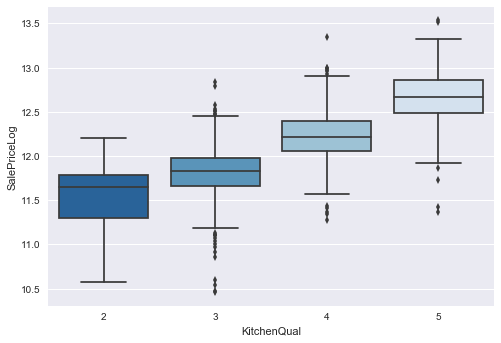

In [54]:
sns.boxplot(data.KitchenQual, data.SalePriceLog, palette=sns.color_palette("Blues_r", 4))
plt.figure(figsize=(8, 6))
plt.show()

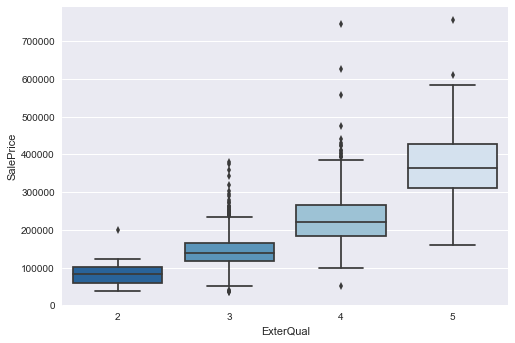

In [55]:
sns.boxplot(data.ExterQual, data.SalePrice, palette=sns.color_palette("Blues_r", 4))
plt.figure(figsize=(8, 6))
plt.show()

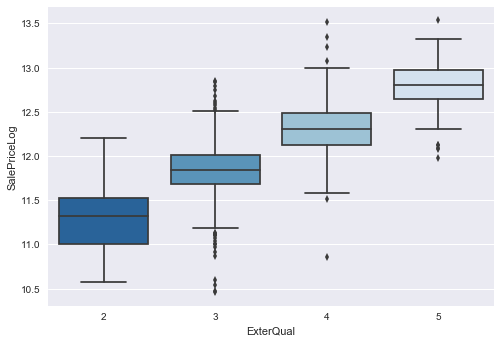

In [56]:
sns.boxplot(data.ExterQual, data.SalePriceLog, palette=sns.color_palette("Blues_r", 4))
plt.figure(figsize=(8, 6))
plt.show()

#### Recent Remodel

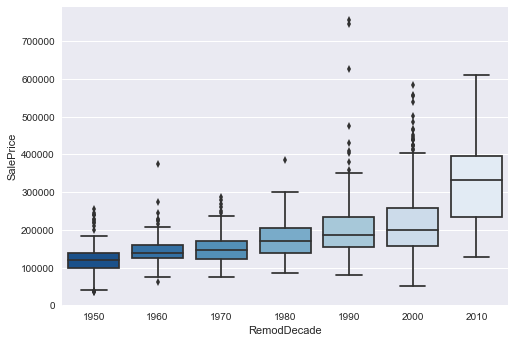

In [57]:
d = data
d['RemodDecade'] = d.YearRemodAdd // 10 * 10
sns.boxplot(d.RemodDecade, d.SalePrice, palette=sns.color_palette("Blues_r", 7))
plt.figure(figsize=(8, 6))
plt.show()

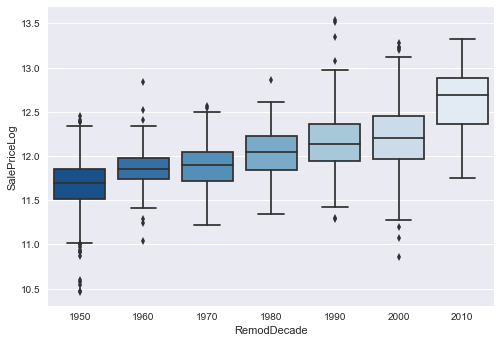

In [58]:
d = data
d['RemodDecade'] = d.YearRemodAdd // 10 * 10
sns.boxplot(d.RemodDecade, d.SalePriceLog, palette=sns.color_palette("Blues_r", 7))
plt.figure(figsize=(8, 6))
plt.show()

#### Above Ground Living Area distribution, scatter and boxplot

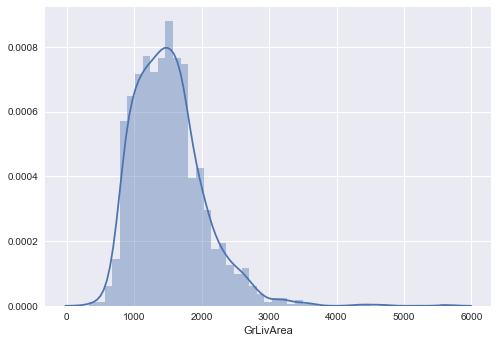

In [59]:
sns.distplot(data.GrLivArea)
plt.show()

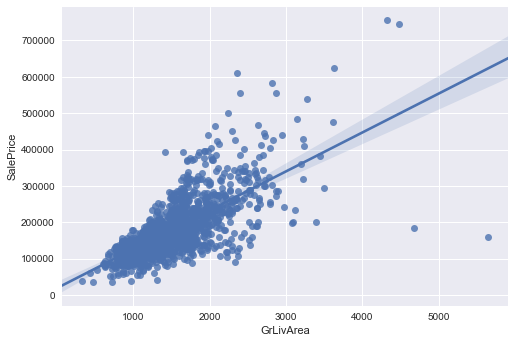

In [60]:
d = data
sns.regplot(d.GrLivArea, d.SalePrice, scatter=True)

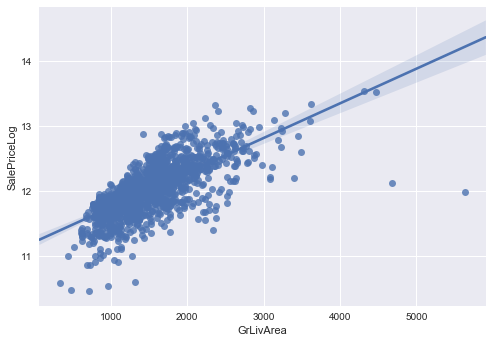

In [61]:
d = data
sns.regplot(d.GrLivArea, d.SalePriceLog, scatter=True)

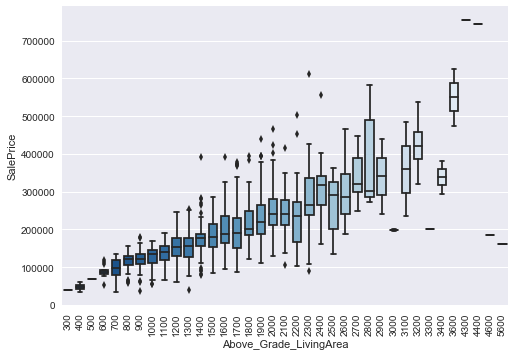

In [62]:
d = data
d['Above_Grade_LivingArea'] = d.GrLivArea // 100 * 100
d.Above_Grade_LivingArea
sns.boxplot(d.Above_Grade_LivingArea, d.SalePrice, palette=sns.color_palette("Blues_r", 37), width=0.7)
plt.xticks(rotation=90)
plt.figure(figsize=(6, 8))
plt.show()

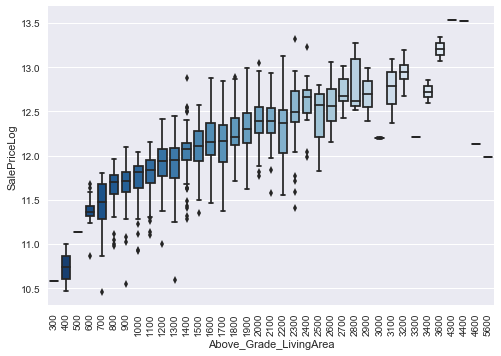

In [63]:
d = data
d['Above_Grade_LivingArea'] = d.GrLivArea // 100 * 100
d.Above_Grade_LivingArea
sns.boxplot(d.Above_Grade_LivingArea, d.SalePriceLog, palette=sns.color_palette("Blues_r", 37), width=0.7)
plt.xticks(rotation=90)
plt.figure(figsize=(6, 8))
plt.show()

#### Total Basement SF scatterplot

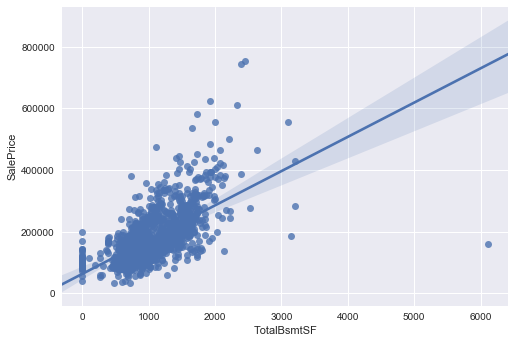

In [64]:
d = data
sns.regplot(d.TotalBsmtSF, d.SalePrice, scatter=True)

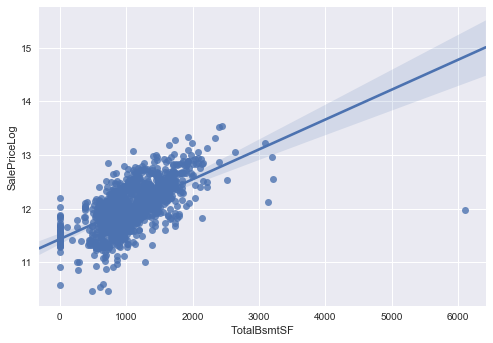

In [65]:
d = data
sns.regplot(d.TotalBsmtSF, d.SalePriceLog, scatter=True)